In [1]:
%pylab inline
from scipy.fftpack import fft, ifft, fftfreq, fftshift
from scipy.optimize import curve_fit
from scipy.special import jv

Populating the interactive namespace from numpy and matplotlib


A.

In [2]:
largoG = 2**10
largoP = 2**5

rendija1 = np.zeros((largoG, largoG), dtype = float32)
rendija1[(largoG - largoP)/2 : (largoG + largoP)/2, (largoG - largoP)/2 : (largoG + largoP)/2] = 1

B.

/home/cohnan/.local/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log


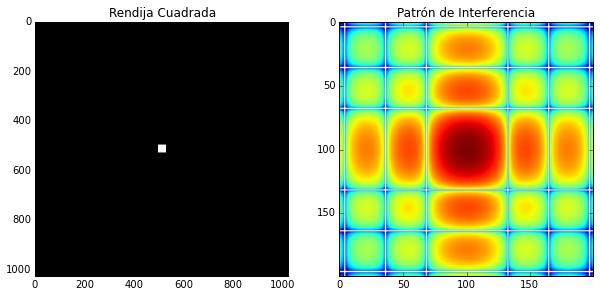

In [3]:
rendija1_dft = fft2(rendija1)
rendija1_shift = fftshift(rendija1_dft)

lado_most1 = 200

mostrar1 = np.log(
    np.absolute(
        rendija1_shift[(largoG - lado_most1)/2 : (largoG + lado_most1)/2, (largoG - lado_most1)/2 : (largoG + lado_most1)/2]
    )**2)

fig = plt.figure('Rendija Cuadrada', figsize = (10, 5))

ax1 = fig.add_subplot(121)
ax1.imshow(rendija1, cmap = 'gray')
ax1.set_title(u"Rendija Cuadrada")

ax2 = fig.add_subplot(122)
ax2.imshow(mostrar1)
ax2.set_title(u"Patrón de Interferencia")

plt.show( )

C.

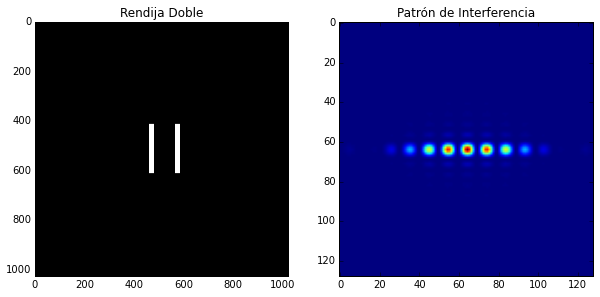

In [4]:
largoP = 200

grosor = 20
altura = 200

inicio_1 = 459
inicio_2 = 564

lado_most2 = 128

rendija2 = np.zeros((largoG, largoG), dtype = float32)
rendija2[(largoG - largoP)/2 : (largoG + largoP)/2, inicio_1 : inicio_1 + grosor] = 1
rendija2[(largoG - largoP)/2 : (largoG + largoP)/2, inicio_2 : inicio_2 + grosor] = 1

rendija2_dft = fft2(rendija2)
rendija2_shift = fftshift(rendija2_dft)

mostrar2 = np.absolute(
        rendija2_shift[(largoG - lado_most2)/2 : (largoG + lado_most2)/2, (largoG - lado_most2)/2 : (largoG + lado_most2)/2]
    )**2

fig = plt.figure('Rendija Doble', figsize = (10, 5))

ax1 = fig.add_subplot(121)
ax1.imshow(rendija2, cmap = 'gray')
ax1.set_title(u"Rendija Doble")

ax2 = fig.add_subplot(122)
ax2.imshow(mostrar2)
ax2.set_title(u"Patrón de Interferencia")

plt.show( )

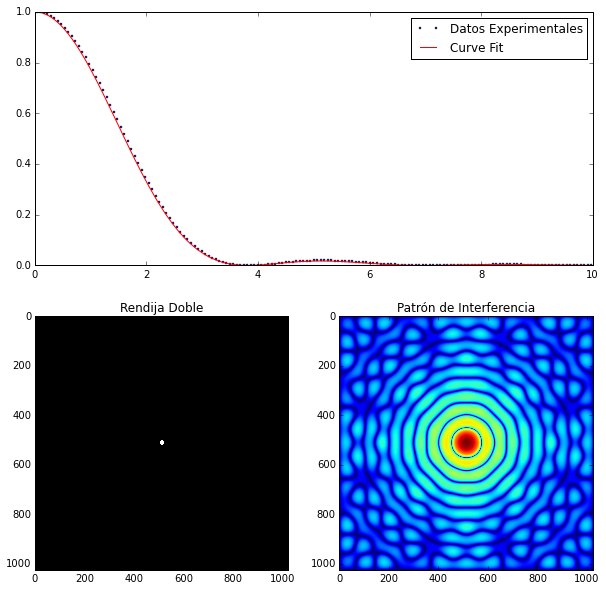

In [36]:
largoG = 2**10
radioP = 0.01*largoG

lado_most3 = largoG

rendija3 = np.zeros((largoG, largoG), dtype = float32)

for i in range(largoG):
    for j in range(largoG):
        if (i + 0.5 - largoG/2)**2 + (j + 0.5 - largoG/2)**2 <= radioP**2:
            rendija3[i, j] = 1

rendija3_dft = fft2(rendija3)
rendija3_shift = fftshift(rendija3_dft)

mostrar3 = np.log(
    np.absolute(
        rendija3_shift[(largoG - lado_most3)/2 : (largoG + lado_most3)/2, (largoG - lado_most3)/2 : (largoG + lado_most3)/2]
    )**2 + 1)

fig = plt.figure('Rendija Circular', figsize = (10, 10))

ax1 = fig.add_subplot(223)
ax1.imshow(rendija3, cmap = 'gray', interpolation = 'Nearest')
ax1.set_title(u"Rendija Doble")

ax2 = fig.add_subplot(224)
ax2.imshow(mostrar3)
ax2.set_title(u"Patrón de Interferencia")

ax3 = fig.add_subplot(211)

x = 2*np.pi*radioP/1024.*np.linspace(-512,512,1024)
y = np.exp(mostrar3[largoG / 2,:])/np.exp(mostrar3[largoG / 2, largoG / 2])
ax3.set_xlim([0, 10])
ax3.plot(x, y, 'bo', ms = 2, label = 'Datos Experimentales')
ax3.plot(x, funcion(x, 1.00371387), 'r-', label = 'Curve Fit')
ax3.legend( )

plt.show( )

In [16]:
from scipy.special import jv

def funcion(x, c):
    return (2*jv(1, c*x) / (c*x))**2

print curve_fit(funcion, x, y)

(array([ 1.00371387]), array([[  3.47585821e-07]]))


In [56]:
from scipy.signal import argrelextrema as relex

#[e for e in x if (e < 12 and e >=0)]
new_arr_x = array([e for e in x if (e < 12 and e >=0)])
new_arr_y = array([funcion(e, 1.00371387) for e in new_arr_x])

ind1 = relex(new_arr_y, np.greater)
xs1 = [new_arr_x[i] for i in ind1]

print ind1
print xs1
print [funcion(e, 1.00371387) for e in xs1]

ind2 = relex(new_arr_y, np.less)
xs2 = [new_arr_x[i] for i in ind2]

print ind2
print xs2
print [funcion(e, 1.00371387) for e in xs2]

(array([ 81, 133, 184]),)
[array([  5.12580169,   8.39625185,  11.60380874])]
[array([ 0.01749638,  0.00415757,  0.00159947])]
(array([ 60, 111, 161]),)
[array([  3.80504297,   7.01259986,  10.15726347])]
[array([  7.00848113e-06,   3.85271788e-06,   1.10857281e-06])]
